In [5]:
import numpy as np

# Análise Nodal

![](fig/circuito1.png)

$R = \frac{V}{I}$

![](fig/circuito2.png)

Notebook Kleverton, Eliel e André

In [13]:
r =3
n = 2 # 3 nós, sendo 1 nó de referência

# Entrada retirada do Grafo
A =np.array([[-1, 1, 0], [0,-1,1]])

G = np.zeros((r, r))
G[0, 0] = 1/6
G[1,1] = 1/2
G[2, 2] = 1/2


Is = np.zeros((r, 1))
Is[0,0] = 3.75

Vs = np.zeros((r, 1))


# Matrizes
A = np.matrix(A)
G = np.matrix(G)
Vs = np.matrix(Vs)
Is = np.matrix(Is)

#Calculos
Gb = A*G*A.T
E= Gb.I*A*(G*Vs-Is)
V = A.T*E
I = Is + G*(V-Vs)
I

matrix([[2.25],
        [2.25],
        [2.25]])

In [17]:
45/12


3.75

In [15]:
import numpy as np

nN = int(input("Numero de Nós L.I.: "))
nR = int(input("Numero de Ramos: "))
A = np.zeros((nN, nR))

for r in range(nR):
    i = int(input("Nó de partida do ramo %d : " %(r +1)))
    j = int(input("Nó de chegada do ramo %d : " %(r + 1)))
    if ((i != j)and(i>0)):
        A[i - 1, r ] = 1
    if ((i != j)and(j>0)):
        A[j - 1, r] = -1
    
        
A

Numero de Nós L.I.: 2
Numero de Ramos: 4
Nó de partida do ramo 1 : 0
Nó de chegada do ramo 1 : 1
Nó de partida do ramo 2 : 1
Nó de chegada do ramo 2 : 0
Nó de partida do ramo 3 : 1
Nó de chegada do ramo 3 : 2
Nó de partida do ramo 4 : 2
Nó de chegada do ramo 4 : 0


array([[-1.,  1.,  1.,  0.],
       [ 0.,  0., -1.,  1.]])

In [1]:
import networkx as nx

In [2]:
G = nx.DiGraph()
#G.add_edges_from([[0, 1], [1,0], [1, 2], [2, 0]])
G.add_edge(1, 0, r=8, vs=0, i_s=0)
G.add_edge(0, 1, r=4, vs=0, i_s=0)
G.add_edge(1, 2, r=4, vs=0, i_s=0)
G.add_edge(2, 1, r=12, vs=0, i_s=0)
G.add_edge(2, 0, r=1e30, vs=0, i_s=8)

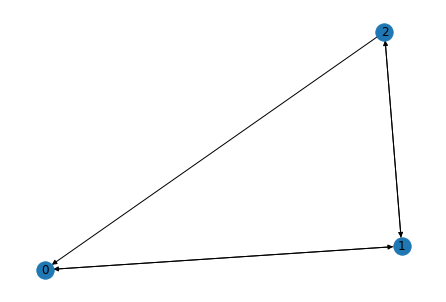

In [3]:
nx.draw(G, with_labels=True)

In [4]:
import numpy as np

nN = G.number_of_nodes() - 1
nR = G.number_of_edges()
A = np.zeros((nN, nR))
G_ = np.zeros((nR, nR))
Is = np.zeros((nR, 1))
Vs = np.zeros((nR, 1))

i = 0
for r in G.edges:
    nP = r[0]
    nC = r[1]
    #print("Ramo ", i, " (", np," ,", nc, ")")
    if (nP != 0):
      A[nP-1, i ] = 1.
    if (nC != 0):
      A[nC-1, i ] = -1.
    G_[i][i]= 1./G[nP][nC]['r']
    Is[i, 0] = G[nP][nC]['i_s']
    Vs[i, 0] = G[nP][nC]['vs']
    i += 1



# Matrizes
A = np.matrix(A)
G_ = np.matrix(G_)
Vs = np.matrix(Vs)
Is = np.matrix(Is)

Gb = A*G_*A.T
print("Gb=",Gb)
E= Gb.I*A*(G_*Vs-Is)
print("E=", E)
V = A.T*E
print("V=", V)
I = Is + G_*(V-Vs)
print("I=", I)

Gb= [[ 0.70833333 -0.33333333]
 [-0.33333333  0.33333333]]
E= [[-21.33333333]
 [-45.33333333]]
V= [[-21.33333333]
 [ 24.        ]
 [ 21.33333333]
 [-24.        ]
 [-45.33333333]]
I= [[-2.66666667]
 [ 6.        ]
 [ 5.33333333]
 [-2.        ]
 [ 8.        ]]


![](fig/ramo_k.png)


Em um ramo k:

$i_k = i_{sk} + g_k*(v - v_{sk})$

Todos os ramos do circuito:

$I = I_S + G*(V - V_S)$

Multiplicando ambos os membros da igualdade pela Matriz A:

$A*I = A*I_S + A*G*V - A*G*V_S$

Considerando, A*I = 0 (LKC) e $v = A^t*E$:

$0 = A*I_S + A*G*A^t*E - A*G*V_S$

$A*G*A^t*E = A*G*V_S-A*I_S$

$G_{barra}*E = A*(G*V_S -I_S)$